Author    : Erkhembayar J.

Purpose   : Advanced Training for AI Drug Discovery (Educational Purpose)

Link      : 

<u>**Contents**</u>
- Building Graph from stratch
- Compound Representation to Graph

Korea AI Center for Drug Discovery and Development (KAICD) 2020

---



# **Coding Session Environment Setting**
## Libraries used in coding session
* networkx, dgl - graph library
* rdkit - library for chemistry
* dgllife - graph library for chemistry and biology

## Graph Library Installation

In [2]:
!pip install networkx nx_altair dgl dgllife

     |████████████████████████████████| 3.5MB 5.9MB/s 
     |████████████████████████████████| 133kB 43.2MB/s 
  Created wheel for dgllife: filename=dgllife-0.2.6-cp36-none-any.whl size=205837 sha256=033ff25a69f10e9b37bdbbe8084e37d019ede3d120d7028f0a78a2a07649e22d
  Stored in directory: /root/.cache/pip/wheels/cf/29/39/54bbf37c8999f605d347805d4dec838e9ca8a894c90b119600
Successfully built dgllife


## Miniconda and RDKIT installation

In [4]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-latest-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

conda install -q -y --channel defaults conda python=3.7
conda update -q -y --channel defaults --all --yes
conda install -q -y -c conda-forge rdkit

PREFIX=/usr/local
Unpacking payload ...
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
failed
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda
    - python=3.7


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2020.11.~ --> pkgs/main::ca-certificates-2020.10.14-0
  certifi            conda-forge::certifi-2020.11.8-py37h8~ --> pkgs/main::certifi-2020.11.8-py37h06a4308_0
  conda              conda-forge::conda-4.9.2-py37h8

--2020-11-24 01:16:28--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2020-11-24 01:16:28--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94235922 (90M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh.1’

     0K .......... .......... .......... .......... ..........  0% 56.0M 2s
    50K .......... .......... .......... .......... ........

# **WHAT WILL YOU LEARN ?**
### **Goal**
In this training session, you`re going to create your own graph representation of chemicals from stratch.
### **Learning Objectives**
1. Basic Graph Construction from stratch
2. Compound to Graph Representation from stratch


<p align="center">
  <img src='https://drive.google.com/uc?id=1D1n_XNCGPlsx2ueh3Ubuh5OCG1HbV66V' />
</p>


[Figure 1: Learning Objectives ](https://training.hermee.dev/#/1)

## COLAB LIBRARY SETTING
<details>
<summary>
<font size="3" color="green">
<b>Optional hint for <code><font size="4">colab python path</font></code></b>
</font>
</summary>

1. System python path: '/usr/local/lib/python3.6/dist-packages/' (every packages installed by using '*pip install*' will be installed here )
2. Conda python path: '/usr/local/lib/python3.7/site-packages/' (every packages installed by using '*conda install*' will be installed here)

In [5]:
import sys
sys.path

['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython']

In [6]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
!export DGLBACKEND=pytorch

In [7]:
import torch
import dgl
import dgllife
import rdkit

print(f'Pytorch version: {torch.__version__}')
print(f'DGL version: {dgl.__version__}')
print(f'DGLlife version: {dgllife.__version__}')
print(f'RDKIT version: {rdkit.__version__}')

DGL backend not selected or invalid.  Assuming PyTorch for now.
Using backend: pytorch


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)
Pytorch version: 1.7.0+cu101
DGL version: 0.5.2
DGLlife version: 0.2.6
RDKIT version: 2020.09.1


#**1. Building Graph from Stratch (basic content)**



## **1.1 Getting Started**


**Learning Objectives**

You will begin by constructing graph from stratch and by using some useful packages (networkx, dgl). The example graph will help you create your graph. You are alos provided a vizualizer to help visualize the graph.
* Building graph from stratch
* Building graph using libraries (networkx, dgl)
* Visualization

---

**A Graph**
* Graph ($\mathcal{G}$) is a type of data structure that models set of objects (nodes - $\mathcal{V}$) and their relationships (edges - $\mathcal{E}$)

\begin{align}
\mathcal{G} = (\mathcal{V}, \mathcal{E}),  \text{where } \mathcal{V}\in  \text{a set of vertices },  \mathcal{E} \subseteq (\mathcal{u},\mathcal{v}) \tag{1}
\end{align}


<!-- ![picture]() -->
<p align="center">
  <img src='https://drive.google.com/uc?id=1diQ-q8gl5w8X-GtzQhIs5xVxPjhfhh6R' />
</p>

---
**The Example Graph**
* Nodes: {A, B, C, D, E, F, G}
* Indices: {0, 1, 2, 3, 4, 5, 6}
* Edges: [(0, 1), (1, 2), (1, 3), (1, 4),  (2, 5), (5, 6), (6, 3)]

---

Python has no built-in data type or class for graphs, but it is easy to implement them in Python. list and dictionary are ideal for representing graphs in Python.
    

1.   Graph Construction Using List Objects
2.   Graph Construction Using Dictionary Objects



## **1.2 Graph Construction Using List Objects**







To define graph from python list:

1. Define nodes names
2. Define indices list 
3. Define edge list
4. Create First Graph Class

<details>
<summary>
<font size="3" color="green">
<b>Optional Hint for <code><font size="4">node indices</font></code></b>
</font>
</summary>

* Node indices usually used to represent node
</details>

In [9]:
# nodes
node_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# node indices to represent nodes
nodes = []

for index, name in enumerate(node_names):
    nodes.append(index)
    print(f'{index}: {name}')

0: A
1: B
2: C
3: D
4: E
5: F
6: G


In [10]:
nodes

[0, 1, 2, 3, 4, 5, 6]

In [11]:
# edges 
edges = [(0, 1), 
         (1, 2), (1, 3), (1, 4), 
         (2, 5),
         (5, 6),
         (6, 3)
        ]

In [12]:
edges

[(0, 1), (1, 2), (1, 3), (1, 4), (2, 5), (5, 6), (6, 3)]

**Simple Graph Construction**
---
Let`s define a graph object from list
*   Graph class with 2 input parameters
*   Nodes: represents node indices (type: python list)
*   Edges: represents edges (type: python list)

---
<details>
<summary>
<font size="3" color="green">
<b>Optional hints for python <code><font size="4">dataclass</font></code></b>
</font>
</summary>

1. A data class is a class typically containing mainly data (**starting from python 3.7**). It is created using the new @dataclass decorator.
2. It simplifies the process of creating classes (less coding)
2. See python dataclasses [here](https://docs.python.org/3/library/dataclasses.html)
</details>

In [14]:
# lets define simple graph class
# simple graph class
from dataclasses import dataclass
from typing import Any, List


@dataclass
class Graph:
    """"
    Simple graph object

    Parameters
    ----------
    nodes: List
        Nodes of graph
    edges: List 
        Edges of graph
    """

    nodes: List=None
    edges: List=None 

    def num_nodes(self) -> int:
        # getting the number of nodes
        return len(nodes)

    def num_edges(self) -> int:
        # getting the number of edges
        return len(edges)

    def info(self) -> None:
        # displaying the graph we have defined
        print(f"# of nodes: {self.num_nodes()}\n# of edges: {self.num_edges()}")

    def to_nx(self) -> None:
        NotImplemented

    def to_dgl(self) -> None:
        NotImplemented

    def your_function(self):
        NotImplemented 


<details>
<summary>
<font size="3" color="green">
<b>Previously defined <code><font size="4">nodes and edges</font></code></b>
</font>
</summary>

1. nodes = [0,1,2,3,4,5,6]
2. edges = [(0, 1), (1, 2), (1, 3), (1, 4), (2, 5), (5, 6), (6, 3)]
</details>


In [16]:
# creating first graph instance
my_graph = Graph()
my_graph.info()

# of nodes: 7
# of edges: 7


In [18]:
my_graph

Graph(nodes=None, edges=None)

## **1.3 Graph Construction by Existing Libraries**
---

Two common libraries used by most data scientist
* networkx (link: [Networkx website](https://networkx.org/))
* dgl (link: [DGL website](https://docs.dgl.ai/en/latest/))

### **1.3.1 Graph Construction by Networkx**

---

Networkx is good for graph visualization topological and linkage analysis.
Creating graph in networkx:
  

1.   create network graph
2.   add nodes from (list or scalar)
3.   add edges from (list or scalar)



In [19]:
import networkx as nx

# create empty networkx graph
nx_g = nx.Graph()


In [22]:
nx.info(nx_g)

'Name: \nType: Graph\nNumber of nodes: 0\nNumber of edges: 0\n'

In [23]:
"""
  Let`s use previously defined nodes and edges
  1. nodes = [0,1,2,3,4,5,6]
  2. edges = [(0, 1), (1, 2), (1, 3), (1, 4), (2, 5), (5, 6), (6, 3)]
"""

nx_g.add_nodes_from(nodes)
nx_g.add_edges_from(edges)

In [24]:
# graph information display
nx.info(nx_g)


'Name: \nType: Graph\nNumber of nodes: 7\nNumber of edges: 7\nAverage degree:   2.0000'

**Simple Visualization**

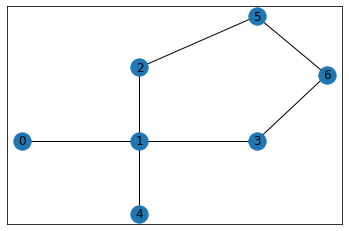

In [26]:
%matplotlib inline
import matplotlib.pylab as plt

# predefiend position coordinates for each nodes
pos = {0: (10, 10), 1: (15, 10), 2: (15, 20), 3: (20, 10), 4: (15, 0), 5: (20, 27), 6: (23, 19)}
nx.draw_networkx(nx_g, pos)

**Simple Linkage Analysis**


*   PageRank

\begin{align}
\mathcal{r_j^{(n)}} = (1-\alpha)\times r_j^{(0)} + (\alpha) \times \sum_{i=1}^{n} \frac{w_{ij}\times r_j^{(0)}}{deg_{i}} \tag{2}
\end{align} 





In [31]:
# simple page rank
rank = nx.pagerank(nx_g, alpha=0.85)
rank

{0: 0.13279950892857142,
 1: 0.16912495535714284,
 2: 0.13993466517857142,
 3: 0.13993466517857142,
 4: 0.13279950892857142,
 5: 0.1427033482142857,
 6: 0.1427033482142857}

In [28]:
# sort ranking result 
sorted(rank.items(), key=lambda x: x[1], reverse=True)



[(1, 0.2771509285521139),
 (5, 0.14089622813240193),
 (6, 0.14089622813240193),
 (2, 0.14020466399977227),
 (3, 0.14020466399977227),
 (0, 0.08032364359176883),
 (4, 0.08032364359176883)]



*   Personalized PageRank



In [ ]:
prior_knowledge = {6:1}

# page rank with initial knowledge
rank_personalized = nx.pagerank(nx_g, alpha=0.85, personalization=prior_knowledge)

sorted(rank_personalized.items(), key=lambda x: x[1], reverse=True)

[(6, 0.29235427899433736),
 (1, 0.18300575739512334),
 (5, 0.17181184250643114),
 (3, 0.16314002293541047),
 (2, 0.11190948273802326),
 (0, 0.03888930771533725),
 (4, 0.03888930771533725)]

**Simple Topological Analysis**


*   Degree centrality
*   Betweenness etc.



In [56]:
d_centrality = nx.degree_centrality(nx_g)
sorted(d_centrality.items(), key=lambda x: x[1], reverse=True)

[(1, 0.6666666666666666),
 (2, 0.3333333333333333),
 (3, 0.3333333333333333),
 (5, 0.3333333333333333),
 (6, 0.3333333333333333),
 (0, 0.16666666666666666),
 (4, 0.16666666666666666)]

### **1.3.2 Graph Visualization**
**Visualization of Graph with Labels and Weighted Edges**

1.   Define initial labels
2.   Define some weights
3.   Add labels and weights to graph
4.   Visualize labels and weights



<!-- ![picture]() -->
<p align="center">
  <img src="https://drive.google.com/uc?id=1ret2wNIt11XZRAr-jtKXpTFnMahYUEqT" />
</p>


In [57]:
# initial labeles 
initial_knowledges = [1, 0, 0, 0, 0, -1, 0]
# weights 
initial_weights = [0.4, 0.4, 0.4, 0.9, 0.1, 0.4, 0.1]


In [58]:
# let`s remember information about our graph
nx_g.nodes(), nx_g.edges()

(NodeView((0, 1, 2, 3, 4, 5, 6)),
 EdgeView([(0, 1), (1, 2), (1, 3), (1, 4), (2, 5), (3, 6), (5, 6)]))

In [61]:
# assign initial nodel labels
for (node,  init_h) in zip(nx_g.nodes(), initial_knowledges):
    nx_g.nodes[node]['h'] = init_h

# assign initial nodel labels
for edge, init_w in zip(nx_g.edges(), initial_weights):
    nx_g.edges[edge]['weights'] = init_w

In [62]:
import nx_altair as nxa

viz = nxa.draw_networkx(
    nx_g, pos=pos,
    node_color='h',
    cmap='viridis',
    width='weights',
    edge_color='black',
)

viz.interactive()

alt.LayerChart(...)

### **1.3.3 Graph Construction by DGL**
DGL library mostly used for graph neural network
---
 - pytorch, mxnet
 - GCN, GAT, GraphSage etc (~ over 30 graph paper models)
 - backed by amazon

---



Let`s create simple dgl graph

*   dgl represents each node by a unique number (index)
*   dgl represents nodes with 1-D integer tensor (e.g: torch.tensor)
*   edges are represented in a tuple of node-tensors (U, V)
* edge from $U_i$ to $V_i$



In [65]:
nodes = [0, 1, 2, 3, 4, 5, 6]
edges = [(0, 1), (1, 2), (1, 3), (1, 4), (2, 5), (5, 6), (6, 3)]
nodes, edges

([0, 1, 2, 3, 4, 5, 6],
 [(0, 1), (1, 2), (1, 3), (1, 4), (2, 5), (5, 6), (6, 3)])

Example Graph
<!-- ![picture]() -->
<p align="center">
  <img src='https://drive.google.com/uc?id=13C_XlRls-pczgxqyrS_eodxS6R9kcH-W' />
</p>



In [66]:
u = [] # list contains source nodes
v = [] # list contains destination nodes

for edge in edges:
    u.append(edge[0])
    v.append(edge[1])

print(f'U: {u}')
print(f'V: {v}')

U: [0, 1, 1, 1, 2, 5, 6]
V: [1, 2, 3, 4, 5, 6, 3]



DGL is good for graph deep learning (>30 paper methods) and has better node and edge feature representation.
Creating graph in dgl:
  

1.   creating dgl graph from edge tuples (u, v)
2.   creating dgl graph from networkx 




In [67]:
import dgl 
import torch

# creating from edge tuples
dgl_g = dgl.graph((u, v))


In [ ]:
dgl_g

Graph(num_nodes=7, num_edges=7,
      ndata_schemes={}
      edata_schemes={})

In [77]:
# creating from networkx

dgl_from_nx = dgl.from_networkx(nx_g)
dgl_from_nx

Graph(num_nodes=7, num_edges=14,
      ndata_schemes={}
      edata_schemes={})

**Node and Edge Features**
* DGLGraph has several used defined named features for storing graph-specific properties of **nodes** and **edges**
* Node and edge features can be accessed via the <font color='red'>ndata</font> and <font color='red'>edata</font> interface.
* <font color='red'>ndata</font>: node features
* <font color='red'>edata</font>: edge features

---
<details>
<summary>
<font size="3" color="green">
<b>Optional hint for <code><font size="4">dgl features</font></code></b>
</font>
</summary>
1. <font color='red'>DGL only accepts features in numerical types </font>
</details>

<!-- ![picture]() -->
<p align="center">
  <img src="https://drive.google.com/uc?id=1-XJPrpPIUdtgZcFoRdCp_S90tkpS0249" />
</p>

Let`s create toy set problem


1.   lets assume each node represent a person 
2.   Each person has own features (e.g: ages, heights, weights) etc)
3.   Each person have its own class label (e.g: basket player or not)
4.   Let`s assume they have imaginary relationship defined by some weight



In [81]:
import pandas as pd

# node features (person features)
ages = [40, 30, 20, 45, 40, 20, 34]
heights = [165, 175, 170, 165, 175, 200, 190]
labels = ['A', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'B', 'Unknown']


# edge features (friendship )
edge_weights = [0.4, 0.4, 0.4, 0.9, 0.1, 0.4, 0.1]

# let`s create dataframe holds node informations
node_df = pd.DataFrame(list(zip(nodes, ages, heights, labels)), columns=['id', 'age', 'heights', 'labels'])

# let`s create datafram holds edge informations
edge_df = pd.DataFrame(list(zip(u, v, edge_weights)), columns=['src', 'dst', 'weights'])


In [82]:
node_df

,id,age,heights,labels
0,0,40,165,A
1,1,30,175,Unknown
2,2,20,170,Unknown
3,3,45,165,Unknown
4,4,40,175,Unknown
5,5,20,200,B
6,6,34,190,Unknown


In [83]:
edge_df

,src,dst,weights
0,0,1,0.4
1,1,2,0.4
2,1,3,0.4
3,1,4,0.9
4,2,5,0.1
5,5,6,0.4
6,6,3,0.1


**Adding node and edge features to graph**

In [84]:
dgl_g, dgl_g.nodes(), dgl_g.edges()

(Graph(num_nodes=7, num_edges=7,
       ndata_schemes={}
       edata_schemes={}),
 tensor([0, 1, 2, 3, 4, 5, 6]),
 (tensor([0, 1, 1, 1, 2, 5, 6]), tensor([1, 2, 3, 4, 5, 6, 3])))

In [90]:
import torch.nn.functional as F

# adding node features
dgl_g.ndata['ages'] = torch.tensor(ages,dtype=torch.float)/ 100
dgl_g.ndata['heights'] = torch.tensor(heights, dtype=torch.float) / 100
_classes = torch.tensor([label == 'B' for label in labels]).long()
dgl_g.ndata['labels'] = _classes
dgl_g.ndata['labels_one_hot'] = F.one_hot(_classes)

# adding edge features
dgl_g.edata['weights'] = torch.tensor(edge_weights)


In [91]:
# node features
dgl_g.ndata

{'ages': tensor([0.4000, 0.3000, 0.2000, 0.4500, 0.4000, 0.2000, 0.3400]), 'heights': tensor([1.6500, 1.7500, 1.7000, 1.6500, 1.7500, 2.0000, 1.9000]), 'labels': tensor([0, 0, 0, 0, 0, 1, 0]), 'labels_one_hot': tensor([[1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [0, 1],
        [1, 0]])}

In [87]:
# edge features
dgl_g.edata['weights']


tensor([0.4000, 0.4000, 0.4000, 0.9000, 0.1000, 0.4000, 0.1000])

In [95]:
# very dummy example of deep learning on graph
# try it home
# a semi-supervised node classification task.
# use a GraphSAGE model [Hamilton et al.](https://arxiv.org/abs/1706.02216)
from torch import nn
from dgl.nn import SAGEConv

node_embed = nn.Embedding(dgl_g.number_of_nodes(), 3)  # Every node has an embedding of size 3.
inputs = node_embed.weight                             # Use the embedding weight as the node features.
nn.init.xavier_uniform_(inputs)
labels = dgl_g.ndata['labels']
labeled_nodes = [0, 5]
print('Labels', labels[labeled_nodes])


class DummyGraphNN(nn.Module):
    def __init__(self, in_feats, h_feats, num_classes):
        super(DummyGraphNN, self).__init__()
        self.conv1 = SAGEConv(in_feats, h_feats, 'mean')
        self.conv2 = SAGEConv(h_feats, num_classes, 'mean')
    
    def forward(self, g, in_feat):
        h = self.conv1(g, in_feat)
        h = F.relu(h)
        h = self.conv2(g, h)
        return h
net = DummyGraphNN(3, 24, 2)
net

Labels tensor([0, 1])


DummyGraphNN(
  (conv1): SAGEConv(
    (feat_drop): Dropout(p=0.0, inplace=False)
    (fc_self): Linear(in_features=3, out_features=24, bias=True)
    (fc_neigh): Linear(in_features=3, out_features=24, bias=True)
  )
  (conv2): SAGEConv(
    (feat_drop): Dropout(p=0.0, inplace=False)
    (fc_self): Linear(in_features=24, out_features=2, bias=True)
    (fc_neigh): Linear(in_features=24, out_features=2, bias=True)
  )
)

In [101]:
# do it at home change the data
import dgl
import torch
import torch.nn as nn
import torch.nn.functional as F
import itertools

optimizer = torch.optim.Adam(itertools.chain(net.parameters(), node_embed.parameters()), lr=0.01)

all_logits = []
for e in range(100):
    # forward
    logits = net(dgl_g, inputs)
    
    # compute loss
    logp = F.log_softmax(logits, 1)
    loss = F.nll_loss(logp[labeled_nodes], labels[labeled_nodes])
    
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    all_logits.append(logits.detach())
    
    if e % 5 == 0:
        print('In epoch {}, loss: {}'.format(e, loss))

pred = torch.argmax(logits, axis=1)
print('Accuracy', (pred == labels).sum().item() / len(pred))

In epoch 0, loss: 0.0
In epoch 5, loss: 0.0
In epoch 10, loss: 0.0
In epoch 15, loss: 0.0
In epoch 20, loss: 0.0
In epoch 25, loss: 0.0
In epoch 30, loss: 0.0
In epoch 35, loss: 0.0
In epoch 40, loss: 0.0
In epoch 45, loss: 0.0
In epoch 50, loss: 0.0
In epoch 55, loss: 0.0
In epoch 60, loss: 0.0
In epoch 65, loss: 0.0
In epoch 70, loss: 0.0
In epoch 75, loss: 0.0
In epoch 80, loss: 0.0
In epoch 85, loss: 0.0
In epoch 90, loss: 0.0
In epoch 95, loss: 0.0
Accuracy 0.7142857142857143


#**2. Compound to Graph (advanced content)**




## **2.1 Getting Started**

**Learning Objectives**

You will learn to construct graph from compound.
* Compound Representation by libraries
* Node Featurization from stratch
* Edge Featurization from stratch
* Compound to Graph
* Downstream analysis by using your own representation you learnt

---

### GOAL: Compound to Graph (Data Augmentation)
<p align="center">
  <img src="https://drive.google.com/uc?id=1GY5rH8STQqRprA-SYFnGw1o7aWsrsUt7" />
</p>


Let`s start with simple chemical


*   Read and visualization with RDKIT 





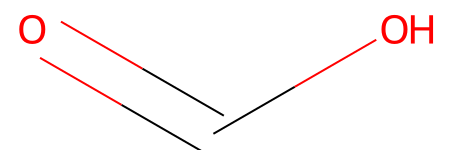

In [103]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True


smile = 'C(=O)O' # formic 
mol = Chem.MolFromSmiles(smile)
mol

Mostly when we representing compounds to graph, we represent atoms as nodes and chemical bonds as edges.


*   Atom features

|    Node Features  |   Elements|
|------|------|
|   atom  | C, O, N, S, F, Cl, Br, ..,  etc| 
|   Formal Charge  | -1, 0, +1| 
|   Implicit H  | 0, 1, 2 ,3 , 4, 5, 6|
|   Chirality  | None, S, R| 
|   Degree of Atom  | topological feature|
|   etc.  | etc. |

*   Edge features


|    Bond Features  |   Elements|
|------|------|
|   Bond Types  | Single, Double, Triple, Aromatic, ..,  etc| 
|   etc.  | etc. |


---
<p align="center">
  <img src="https://drive.google.com/uc?id=10iiTNDL9CyCP1Nnq_S4cWr5AEJPehShZ" />
</p>

## **2.2 Compound to Graph by using external libraries**



**External Libraries**

---


1.   [DGL - pytorch, mxnet](https://github.com/dmlc/dgl) - **dgllife**
2.   [Geometric - pytorch](https://pytorch-geometric.readthedocs.io/en/latest/)
3.   [Spektral - tensorflow](https://github.com/danielegrattarola/spektral)

Most of external libraries uses built-in node and edge featurizer functions to represent atom and edge features of compounds. To represent compounds to graph following steps are usually followed.


1.   Atom Representation by built-in NodeFeaturizer function 
2.   Bond Representation by built-in EdgeFeaturizer function
3.   Built-in Graph construction with node and edge representation






In [104]:
# let`s start with dgl-life library
from dgllife.utils import CanonicalAtomFeaturizer, CanonicalBondFeaturizer

"""
dgllife library provides built-in featurization package for chemicals
    BaseAtomFeaturizer, BaseBondFeaturizer
    CanonicalAtomFeaturizer, CanonicalBondFeaturizer -> default 
    WeaveAtomFeaturizer, WeaveBondFeaturizer -> Steven et. al. 2016
    PreTrainAtomFeaturizer, PreTrain -> Weihua Hu et. al. 2019
    AttentiveFPAtomFeaturizer, AttentiveFPBondFeaturizer -> Zhaoping Xiong et. al. 2019
"""

# calling built-ing node and bond representation
atom_featurizer = CanonicalAtomFeaturizer('atom_feat')
edge_featurizer = CanonicalBondFeaturizer('edge_feat')

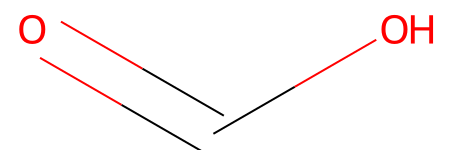

In [105]:
mol

### **2.2.1 Atom Representation**

In [106]:
atom_representation = atom_featurizer(mol)
atom_representation


{'atom_feat': tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
          0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
          0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0

In [107]:
atom_representation['atom_feat'].size()

torch.Size([3, 74])

### **2.2.2 Edge Representation**

In [109]:
edge_representation = edge_featurizer(mol)
edge_representation

{'edge_feat': tensor([[0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
         [1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
         [1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.]])}

In [110]:
edge_representation['edge_feat'].size()

torch.Size([4, 12])

### **2.2.3 Compound to Graph**



*   Graph from SMILE with pre-defined node and edge featurizer
*   Graph from MOL (rdkit) with pre-defined node and edge featurizer



In [111]:
# let`s start with dgl-life library
from dgllife.utils import smiles_to_bigraph, mol_to_bigraph

smile = 'C(=O)O' # formic 
mol = Chem.MolFromSmiles(smile)



In [112]:
# graph from smiles
g_from_smiles = smiles_to_bigraph(smile, 
                                  node_featurizer=atom_featurizer,
                                  edge_featurizer=edge_featurizer,
                                  )

In [113]:
g_from_smiles

Graph(num_nodes=3, num_edges=4,
      ndata_schemes={'atom_feat': Scheme(shape=(74,), dtype=torch.float32)}
      edata_schemes={'edge_feat': Scheme(shape=(12,), dtype=torch.float32)})

In [114]:
# graph from mol
g_from_mol = mol_to_bigraph(mol, 
                            node_featurizer=atom_featurizer,
                            edge_featurizer=edge_featurizer,
                            )

In [115]:
g_from_mol

Graph(num_nodes=3, num_edges=4,
      ndata_schemes={'atom_feat': Scheme(shape=(74,), dtype=torch.float32)}
      edata_schemes={'edge_feat': Scheme(shape=(12,), dtype=torch.float32)})

In [117]:
g_from_mol.ndata['atom_feat'], g_from_mol.ndata['atom_feat'].size()

(tensor([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
          0., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
          0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.

In [116]:
g_from_mol.edata['edge_feat'], g_from_mol.edata['edge_feat'].size()

(tensor([[0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
         [1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
         [1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.]]),
 torch.Size([4, 12]))

 ## **2.3 Understanding Featurization**

>  The CanonicalAtomFeaturizer function includes following features:

*   Atom_features: **43 types**
    * ["C", "N", "O", "S", "F", "Si", "P", "Cl", "Br", "Mg",
     "Na", "Ca", "Fe", "As", "Al", "I", "B", "V", "K", "Tl",
     "Yb", "Sb", "Sn", "Ag", "Pd", "Co", "Se", "Ti", "Zn",
     "H", "Li", "Ge", "Cu", "Au", "Ni", "Cd", "In", "Mn", "Zr",
     "Cr", "Pt", "Hg", "Pb"]
*   Atom degree: **10 types**
    * 0-10
*   ImplicitH: **6 types**
    * 0-6
*   Formal Charges: **4 types**
*   Atom hybridization: **5 types**
    * "SP", "SP2", "SP3", "SP3D", "SP3D2".
*   Is Aromatic (boolean): **2 types**
    * True, False
*   Total Hs on the atom: **4 types**
    * 0-4

<font color='red'>TOTAL NODE FEATURES = 43 + 10 + 6 + 4 + 5 + 2 + 4 = 74</font>
---

> The CanonicalEdgeFeaturizer includes following features:

*   Bond type: **4 types**
    * Single, Double, Triple, Aromatic
*   Whether bond is in a ring of any size: **2 types**
    * boolean (True, False)
*   Stereo configuration of bond: **6 types**
    * 'STEREONONE', 'STEREOANY', 'STEREOZ', 'STEREOE',
      'STEREOCIS', 'STEREOTRANS'


<font color='red'>TOTAL EDGE FEATURES = 4 + 2 + 6 = 12</font>
---

**Featurization is different for each papers.**
> AttentiveFP Featurizer  (Zhaoping Xiong et. al. 2019):

* `B``, ``C``, ``N``, ``O``, ``F``, ``Si``, ``P``, ``S``, ``Cl``, ``As``, ``Se``, ``Br``, ``Te``, ``I``, ``At``, and ``other``.
* atom degree: 0-5
* etc (mostly same with above).
----



**Most of time you will use external libraries, however sometimes there are some issues**


*   it is over engineered and hard to understand
*   based on your objectives and infrastructure, sometimes you do not need sparse feature representation (e.g: de novo drug design)
*   in data science (ML), you need to fully understand what you doing (no black box)

> **WHAT I CAN NOT CREATE, I DO NOT UNDERSTAND**
>> Richard Feynman

**SO it is better to write your own featurizers**


## **2.4 Writing Your Own Representation from Stratch**

### **Goal**
To create your own graph representation of chemicals from stratch.
### **Learning Objectives**
1. Node Representation from stratch
2. Edge Representation from stratch
3. Creating graph with your own node and edge featurizers

### **2.4.1 Node Representation from Stratch**

Let`s start with simple atom features

## Seleted Atom Features
---

|    Node Features  |   Elements|
|------|------|
|   atom  | C, O, N, S, F, Cl, Br, ..,  etc| 
|   Formal Charge  | -1, 0, +1| 
|   Implicit H  | 0, 1, 2 ,3 , 4, 5, 6|
|   Chirality  | None, S, R| 
|   Degree of Atom  | topological feature|
|   etc.  | etc. |



You will begin by constructing graph from stratch and by defining atom features into .
* Define atom level features
* Define encoder that encodes features into one-hot-feature vector
* Define featurizer class


---
<details>
<summary>
<font size="3" color="green">
<b>Optional hints for python <code><font size="4">enum class</font></code></b>
</font>
</summary>

1. An enumeration is a set of symbolic names (members) bound to unique, constant values.
2. More readable and easy to get value by name
3. Easier deployment and microservices communcation
4. See more about python enum class [here](https://docs.python.org/3/library/enum.html)
</details>

In [162]:
from enum import Enum, unique


# creating atom types class
@unique
class Atoms(Enum):
    CARBON = 'C'
    OXYGEN = 'O'
    NITROGEN = 'N'
    SULFUR = 'S'
    FLOURINE = 'F'
    CHLORINE = 'Cl'
    BROMINE = 'Br'
    # you can add based on your research
    # SODIUM = 'Na'

# creating atom charges
@unique
class Charges(Enum):
    MINUS = -1
    ZERO = 0
    PLUS = 1

# creating atom chirality
@unique
class Chirality(Enum):
    NONE = 'None'
    S = 'S'
    R = 'R'

# creating atom charges
@unique
class ImplicitH(Enum):
    SINGLE = 0
    DOUBLE = 1
    TRIPLE = 2

# creating own atom features
@unique
class YourOwnFeatures(Enum):
    NotImplemented


# chosen list
atom_list = [atom.value for atom in Atoms]
charge_list = [charge.value for charge in Charges]
chiralirty_list = [c.value for c in Chirality]
impH_list = [impH.value for impH in ImplicitH]



In [163]:
atom_list, charge_list, chiralirty_list, impH_list

(['C', 'O', 'N', 'S', 'F', 'Cl', 'Br'],
 [-1, 0, 1],
 ['None', 'S', 'R'],
 [0, 1, 2])

**OHE ENCODER**

In [164]:
from typing import Any, List
## one hot encoder function
def to_ohe(x: Any, _list: List) -> List:
    """
        Atom feature encoder

        Parameters:
        -----------
        x: Any 
            any atom feature type
        _list: List
            atom feature types 

        return: List
        ------
            one hot feature boolean vector
    """
    return list(map(lambda s: x ==s, _list))

In [165]:
print(atom_list)
to_ohe('C', atom_list)

['C', 'O', 'N', 'S', 'F', 'Cl', 'Br']


[True, False, False, False, False, False, False]

#### **Version 1**
**BASE NODE REPRESENTATION CLASS**

*   4 arguments with default values

    * atom = ['C', 'O', 'N', 'S', 'F', 'Cl', 'Br']
    * charges = [-1, 0, 1]
    * implicit_h = 

*   self __call__ function
*   4 different atom feature encoder function



In [166]:
from dataclasses import dataclass, field
from typing import List
from rdkit import Chem

# define new type (rdkit library mol type) and lets name it as MOLTYPE
MOLTYPE = Chem.rdchem.Mol


# defining node representation class
@dataclass
class NodeFeaturizer_V1:
    """
    Tutorial NodeFeaturizer Class (version 1)

    Arguments:
    ---------
    atoms: List
        list contains atom types specifically chosen for this tutorial
    charges: List
        list contains formal charges values
    implicit_h: List
        list contains implicit_h values
    chirality: List
        list contains chirality
    """

    atoms: List = field(default_factory=lambda: atom_list)
    charges: List = field(default_factory=lambda: charge_list)
    implicit_h: List = field(default_factory=lambda: impH_list)
    chirality: List = field(default_factory=lambda: chiralirty_list) 

    def __call__(self, mol: MOLTYPE):
        # instance self calling function

        if mol:
            nodes = mol.GetNumAtoms()

            return nodes
        else:
            print("You need to enter some mol")

    def node_features_from_atom_type(self, node: Chem.rdchem.Atom) -> List:
        # converting atom type features to one hot vector
        NotImplemented

    def node_features_from_formal_charge(self, node: Chem.rdchem.Atom) -> List:
        # converting atom formal charge one hot vector
        NotImplemented

    def node_features_from_implicit_h(self, node: Chem.rdchem.Atom) -> List:
        # converting atom implicit_h to one hot vector
        NotImplemented

    def node_features_from_chirality(self, node: Chem.rdchem.Atom) -> List:
        NotImplemented


In [167]:
# instance initialization
foo = NodeFeaturizer_V1()
foo

NodeFeaturizer_V1(atoms=['C', 'O', 'N', 'S', 'F', 'Cl', 'Br'], charges=[-1, 0, 1], implicit_h=[0, 1, 2], chirality=['None', 'S', 'R'])

In [168]:
foo(mol)

3

#### **Version 2**
IMPROVMENT ON CLASS (Node Features to OHE - one-hot-encoding)
let`s improve basic class 


*   let`s add function to get atom features
*   let`s improve '__call__' function 




In [169]:
from dataclasses import dataclass, field
from typing import List
from rdkit import Chem
from collections import defaultdict
import itertools
import numpy as np
import dgl.backend as F


MOLTYPE = Chem.rdchem.Mol

@dataclass
class NodeFeaturizer_V2:
    """
    Tutorial NodeFeaturizer Class (version 2)

    Arguments:
    ---------
    atoms: 
        list contains atom types specifically chosen for this tutorial
    charges:
        list contains formal charges values
    impliciti_h: 
        list contains implicit_h values
    chirality:
        list contains chirality
    """

    atoms: List = field(default_factory=lambda: atom_list)
    charges: List = field(default_factory=lambda: charge_list)
    implicit_h: List = field(default_factory=lambda: impH_list)
    chirality: List = field(default_factory=lambda: chiralirty_list)


    def __call__(self, mol: MOLTYPE):

        if mol:

            # nodes = mol.GetNumAtoms()

            # return nodes
            
            features = defaultdict(list)

            for node in mol.GetAtoms():
                
                _iter = itertools.chain(
                    self.node_features_from_atom_type(node),
                    self.node_features_from_formal_charge(node),
                    self.node_features_from_implicit_h(node),
                    self.node_features_from_chirality(node)
                )
                
                feature_vector = np.fromiter(_iter, int)

                features['node_feats'].append(feature_vector)
            
            return features

        else:
            print("You need to enter some mol")


    def node_features_from_atom_type(self, node: Chem.rdchem.Atom) -> List:

        # converting atom type features to one hot vector

        return to_ohe(node.GetSymbol(), self.atoms)

    def node_features_from_formal_charge(self, node: Chem.rdchem.Atom) -> List:

        # converting atom formal charge feature to one hot vector
        return to_ohe(node.GetFormalCharge(), self.charges)

    def node_features_from_implicit_h(self, node: Chem.rdchem.Atom) -> List:

        # converting implicith feature to one hot vector
        return to_ohe(node.GetTotalNumHs(), self.implicit_h)

    def node_features_from_chirality(self, node: Chem.rdchem.Atom) -> List:
        try:
            chiral_state = node.GetProp("_CIPCode")
        except KeyError:
            chiral_state = self.chirality[0]  # "None"

        return to_ohe(chiral_state, self.chirality)

    ## at home try only one function to encode atom features with NAME
    # def node_features_to_ohe(self, node:Chem.rdchem.Atom, name:str) -> List:

    #     if name == 'atom_type':
    #         return to_ohe(node.GetSymbol(), self.atoms)
    #     elif name == 'charge':
    #         return to_ohe(node.GetFormalCharge(), self.charge)
    #     elif name == 'impH':
    #         return to_ohe(node.GetTotalNumberHs(), self.implicit_h)
    #     elif name == 'chirality'
    #         try:
    #             chiral_state = node.GetProp("_CIPCode")
    #         except KeyError:
    #                 chiral_state = self._chirality[0]  # "None"

    #         return to_ohe(chiral_state, self.chirality)
    #     else:
    #         raise ValueError('Not supported type name')
     





In [170]:
# creating instance from version 2
bar = NodeFeaturizer_V2()
bar(mol)

defaultdict(list,
            {'node_feats': [array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0]),
              array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0]),
              array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0])]})

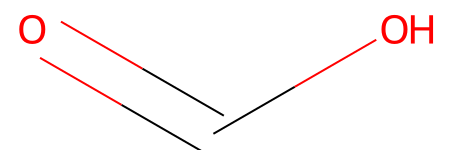

In [171]:
mol

In [172]:
print(bar.atoms)
print(bar.charges)
print(bar.chirality)
print(bar.implicit_h)
print('------------\n')
print('iteration for each atoms')

for node in mol.GetAtoms():
    _atom_symbol = node.GetSymbol()
    print(_atom_symbol)
    features_from_atom = bar.node_features_from_atom_type(node)
    print(features_from_atom)
    print(np.array(features_from_atom, dtype=np.int))

['C', 'O', 'N', 'S', 'F', 'Cl', 'Br']
[-1, 0, 1]
['None', 'S', 'R']
[0, 1, 2]
------------

iteration for each atoms
C
[True, False, False, False, False, False, False]
[1 0 0 0 0 0 0]
O
[False, True, False, False, False, False, False]
[0 1 0 0 0 0 0]
O
[False, True, False, False, False, False, False]
[0 1 0 0 0 0 0]


In [173]:
bar('asdf')

AttributeError: ignored

#### **Final Version** 

*   default name attribute
*   type checking in call function
*   node features to pytorch tensor

In [174]:
from dataclasses import dataclass, field
from typing import List
from rdkit import Chem
from collections import defaultdict
import itertools
import numpy as np
import dgl.backend as F

MOLTYPE = Chem.rdchem.Mol

## Final NodeFeaturizer
@dataclass
class NodeFeaturizer:
    """
    Tutorial NodeFeaturizer Class (final version)

    Arguments:
    ---------
    atoms: 
        list contains atom types specifically chosen for this tutorial
    charges:
        list contains formal charges values
    impliciti_h: 
        list contains implicit_h values
    chirality:
        list contains chirality
    """

    name: str = 'node_features'
    atoms: List = field(default_factory=lambda: atom_list)
    charges: List = field(default_factory=lambda: charge_list)
    implicit_h: List = field(default_factory=lambda: impH_list)
    chirality: List = field(default_factory=lambda: chiralirty_list)


    def __call__(self, mol: MOLTYPE):

        if isinstance(mol, MOLTYPE):
            
            features = defaultdict(list)

            for node in mol.GetAtoms():
                _iter = itertools.chain(
                    self.node_features_from_atom_type(node),
                    self.node_features_from_formal_charge(node),
                    self.node_features_from_implicit_h(node),
                    self.node_features_from_chirality(node)
                )

                feature_vector = np.fromiter(_iter, int)
                features[self.name].append(feature_vector)

            last_features = defaultdict(list)

            # converting numpy array to pytorch tensors
            for key, items in features.items():
                values = np.stack(items)
                last_features[key] = F.zerocopy_from_numpy(values.astype(np.float32))

            return last_features

        else:
            raise ValueError('You can only input rdkit mol type')


    def node_features_from_atom_type(self, node: Chem.rdchem.Atom) -> List:

        # converting atom type features to one hot vector
        return to_ohe(node.GetSymbol(), self.atoms)

    def node_features_from_formal_charge(self, node: Chem.rdchem.Atom) -> List:

        # converting atom formal charge feature to one hot vector
        return to_ohe(node.GetFormalCharge(), self.charges)

    def node_features_from_implicit_h(self, node: Chem.rdchem.Atom) -> List:

        # converting implicith feature to one hot vector
        return to_ohe(node.GetTotalNumHs(), self.implicit_h)

    def node_features_from_chirality(self, node: Chem.rdchem.Atom) -> List:
        try:
            chiral_state = node.GetProp("_CIPCode")
        except KeyError:
            chiral_state = self.chirality[0]  # "None"

        return to_ohe(chiral_state, self.chirality)



In [175]:
# let`s check type error
zoo = NodeFeaturizer()
# zoo(3)

In [176]:
# let`s call with mol type
zoo = NodeFeaturizer()
zoo(mol)

defaultdict(list,
            {'node_features': tensor([[1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.],
                     [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.],
                     [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.]])})

In [177]:
# let`s check size
zoo(mol)['node_features'].size()

torch.Size([3, 16])

FINAL VERSION of YOUR PRESENTATION

<p align="center">
  <img src="https://drive.google.com/uc?id=1yzszhfwOuZWxpEvTWdYpVIynjyYu-ZTH" />
</p>



### **2.4.2 Edge Representation from Stratch**

Let`s start with simple edge features

## Seleted Bond Features
---


|    Bond Features  |   Elements|
|------|------|
|   Bond Types  | Single, Double, Triple, Aromatic, ..,  etc| 
|   etc.  | etc. |

In [178]:
from enum import Enum, unique
from rdkit.Chem import BondType


BONDTYPE = Chem.BondType

@unique
class Bonds(Enum):
    SINGLE = BondType.SINGLE
    DOUBLE = BondType.DOUBLE
    TRIPLE = BondType.TRIPLE
    AROMATIC = BondType.AROMATIC


bond_types = [bond.value for bond in Bonds]


In [179]:
bond_types

[rdkit.Chem.rdchem.BondType.SINGLE,
 rdkit.Chem.rdchem.BondType.DOUBLE,
 rdkit.Chem.rdchem.BondType.TRIPLE,
 rdkit.Chem.rdchem.BondType.AROMATIC]

In [180]:
@dataclass
class EdgeFeaturizer:
    """
    Tutorial NodeFeaturizer Class

    Arguments:
    ---------
    name: str
        name in feature dictionary
    bonds: List[BondType]
        list contains bondtype types specifically chosen for this tutorial
   
    """
    name: str = 'edge_features'
    bonds: List = field(default_factory=lambda: bond_types)

    def __call__(self, mol:MOLTYPE):

        if isinstance(mol, MOLTYPE):
            features = defaultdict(list)
            for bond in mol.GetBonds():
                # 
                btype = bond_types.index(bond.GetBondType())
                
                _iter = itertools.chain(
                    self.edge_features_from_bond_type(bond)
                )

                feature_vector = np.fromiter(_iter, int)

                # One bond between atom u and v corresponds to two edges (u, v) and (v, u)
                features[self.name].extend([feature_vector, feature_vector.copy()])

            last_features = defaultdict(list)

            for key, items in features.items():
                values = np.stack(items)
                last_features[key] = F.zerocopy_from_numpy(values.astype(np.float32))
            return last_features


        else:
            raise ValueError('You can only input rdkit mol type')
    
    def edge_features_from_bond_type(self, edge):
        
        return to_ohe(edge.GetBondType(), self.bonds)

In [181]:
for bond in mol.GetBonds():
    btype = bond_types.index(bond.GetBondType())
    print(btype)

1
0


In [182]:
e = EdgeFeaturizer()
e(mol)

defaultdict(list, {'edge_features': tensor([[0., 1., 0., 0.],
                     [0., 1., 0., 0.],
                     [1., 0., 0., 0.],
                     [1., 0., 0., 0.]])})

<p align="center">
  <img src="https://drive.google.com/uc?id=1g1RWRnLaSi0qjWfcOZ5xL1tkYaC5iyyb" />
</p>


In [184]:
my_node_featurizer = NodeFeaturizer()
my_edge_featurizer = EdgeFeaturizer()

my_node_featurizer(mol), my_edge_featurizer(mol)

(defaultdict(list,
             {'node_features': tensor([[1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.],
                      [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.],
                      [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.]])}),
 defaultdict(list, {'edge_features': tensor([[0., 1., 0., 0.],
                      [0., 1., 0., 0.],
                      [1., 0., 0., 0.],
                      [1., 0., 0., 0.]])}))

## **2.5 Creating graph with your own node and edge featurizers**

let`s how we created graph using external libraries


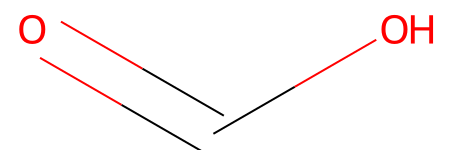

In [185]:
mol

In [186]:
smile

'C(=O)O'

In [187]:
from dgllife.utils import CanonicalAtomFeaturizer, CanonicalBondFeaturizer, smiles_to_bigraph, mol_to_bigraph



# calling built-ing node and bond representation
atom_featurizer = CanonicalAtomFeaturizer('atom_feat')
edge_featurizer = CanonicalBondFeaturizer('edge_feat')

# graph from smiles
g_from_smiles = smiles_to_bigraph(smile, 
                                  node_featurizer=atom_featurizer,
                                  edge_featurizer=edge_featurizer,
                                  )
# graph from mol
g_from_mol = mol_to_bigraph(mol, 
                            node_featurizer=atom_featurizer,
                            edge_featurizer=edge_featurizer,
                            )


In [188]:
g_from_mol

Graph(num_nodes=3, num_edges=4,
      ndata_schemes={'atom_feat': Scheme(shape=(74,), dtype=torch.float32)}
      edata_schemes={'edge_feat': Scheme(shape=(12,), dtype=torch.float32)})

**Let`s define compound to graph function from stratch**
    - define to_dgl_graph function
    - with predefined featurizers

In [189]:
# simple graph from mol rdkit mol object
def to_dgl_graph(mol: MOLTYPE, node_featurizer=None, edge_featurizer=None) -> dgl.DGLGraph:
    

    # graph with empty (u, v)
    g = dgl.graph(([], []), idtype=torch.int32)

     # Add nodes
    num_atoms = mol.GetNumAtoms()
    g.add_nodes(num_atoms)

    # Add edges
    src_list = []
    dst_list = []
    num_bonds = mol.GetNumBonds()
    for i in range(num_bonds):
        bond = mol.GetBondWithIdx(i)
        u = bond.GetBeginAtomIdx()
        v = bond.GetEndAtomIdx()
        src_list.extend([u, v])
        dst_list.extend([v, u])

    g.add_edges(torch.IntTensor(src_list), torch.IntTensor(dst_list))


    ## IMPORTANT
    # add node featurizer
    g.ndata.update(node_featurizer(mol))
    # add edge featurizer
    g.edata.update(edge_featurizer(mol))

    return g

In [190]:
my_node_featurizer = NodeFeaturizer() # the node featurizer you have just created
my_edge_featurizer = EdgeFeaturizer() # the edge featurizer you have just created


# lets check if it works
my_graph = to_dgl_graph(mol,
                        # your own featurizers that you have just created
                        node_featurizer=my_node_featurizer,
                        edge_featurizer=my_edge_featurizer,
                        )



In [191]:
my_graph

Graph(num_nodes=3, num_edges=4,
      ndata_schemes={'node_features': Scheme(shape=(16,), dtype=torch.float32)}
      edata_schemes={'edge_features': Scheme(shape=(4,), dtype=torch.float32)})

In [192]:
my_graph.ndata

{'node_features': tensor([[1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.]])}

In [193]:
my_graph.edata

{'edge_features': tensor([[0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]])}


## **2.6 Optional: Creating universal to graph function with your own node and edge featurizers**


*   The to_graph function with can take both smiles and mol type and create graph



In [194]:

from typing import Union, Optional, Callable


# decorator function that checks input types
def check(f):
  
    def decorator(*args, **kwargs):
        if isinstance(args[0], str):
            mol = read_smi(args[0])
            return f(mol, **kwargs)

        return f(*args, **kwargs)

    return decorator

# smiles reading function
def read_smi(smi: str) -> Union[MOLTYPE, None]:
    """
    Reads SMILE into RDKIT mol object
    :param
        smi:
            The string molecule for which to read.
    :return:
        moltype:
            RDKit mol object
    """

    if len(smi) == 0:
        return None

    mol = Chem.MolFromSmiles(smi)

    if mol is None:
        return None

    return mol



## function that can take both smile and mol type at same time
@check
def to_graph(compound: Optional[str] = MOLTYPE, node_featurizer=None, edge_featurizer=None) -> dgl.DGLGraph:

    # graph with empty (u, v)
    g = dgl.graph(([], []), idtype=torch.int32)

    num_atoms = compound.GetNumAtoms()
    g.add_nodes(num_atoms)

    # Add edges
    src_list = []
    dst_list = []
    num_bonds = compound.GetNumBonds()
    for i in range(num_bonds):
        bond = compound.GetBondWithIdx(i)
        u = bond.GetBeginAtomIdx()
        v = bond.GetEndAtomIdx()
        src_list.extend([u, v])
        dst_list.extend([v, u])

    g.add_edges(torch.IntTensor(src_list), torch.IntTensor(dst_list))

    # add node featurizer
    g.ndata.update(node_featurizer(compound))
    # add edge featurizer
    g.edata.update(edge_featurizer(compound))

    return g



In [195]:
smile = 'C(=O)O' # formic 
mol = Chem.MolFromSmiles(smile)


last_graph_from_mol = to_graph(mol,  
                               node_featurizer=my_node_featurizer,
                               edge_featurizer=my_edge_featurizer)

last_graph_from_smile = to_graph(smile,
                                 node_featurizer=my_node_featurizer,
                                 edge_featurizer=my_edge_featurizer)



In [196]:
last_graph_from_smile

Graph(num_nodes=3, num_edges=4,
      ndata_schemes={'node_features': Scheme(shape=(16,), dtype=torch.float32)}
      edata_schemes={'edge_features': Scheme(shape=(4,), dtype=torch.float32)})

In [197]:
last_graph_from_mol

Graph(num_nodes=3, num_edges=4,
      ndata_schemes={'node_features': Scheme(shape=(16,), dtype=torch.float32)}
      edata_schemes={'edge_features': Scheme(shape=(4,), dtype=torch.float32)})

Now you can use your own featurizer for your downstream analysis
<p align="center">
  <img src="https://drive.google.com/uc?id=1Ex1OT99TpIs8FHKa3P20ND1gvHMi7Oa_" />
</p>




## **2.7 Optional: Use decorator dont worry about your input type**


In [217]:

# using decorator function for simple descriptor calculation
from rdkit import Chem
from rdkit.Chem import QED

@check
def hba(compound: Optional[str] = MOLTYPE):
   
    return Chem.rdMolDescriptors.CalcNumHBA(compound)

@check 
def qed(compound: Optional[str] = MOLTYPE):
    return QED.properties(compound)

smile = 'C(=O)O' # formic 
mol = Chem.MolFromSmiles(smile)

hba_from_smile = hba(smile)
hba_from_mol = hba(mol)

qed_from_smile = qed(smile)
qed_from_mol = qed(mol)


print(f'HBA from smile: {hba_from_smile}')
print(f'HBA from mol: {hba_from_mol}')

print(f'QED from smile: {qed_from_smile}')
print(f'QED from mol: {qed_from_mol}')

HBA from smile: 1
HBA from mol: 1
QED from smile: QEDproperties(MW=46.025000000000006, ALOGP=-0.29919999999999997, HBA=2, HBD=1, PSA=37.3, ROTB=0, AROM=0, ALERTS=1)
QED from mol: QEDproperties(MW=46.025000000000006, ALOGP=-0.29919999999999997, HBA=2, HBD=1, PSA=37.3, ROTB=0, AROM=0, ALERTS=1)


# **3. HOMEWORK**
Solubility Prediction by Using Your Own Graph Representation

<u>**Contents**</u>
- Loading a data from rdkit and creating train/test splits
- Represent traing and test compounds in smiles and mols 
- Create graph training/test dataset
   - Use  **to_graph, NodeFeaturizer and EdgeFeaturizer** (that you have just learnt)
- Create Graph Attention Model (Attentive FingerPrint paper).
- Collate graphs into training batches
- Train your models



### **3.1 Data Loading**

In [ ]:

## HOMEWORK CODE is originated from https://bit.ly/3khbBI6 (https://iwatobipen.wordpress.com/)
## ALL CREDITS GO to seritaka@gmail.com, https://github.com/iwatobipen 
## CAUTION original codes uses dgl 0.4
## in original code, CanonicalAtomFeaturizer and CanonicalEdgeFeaturizer are used
## in homework section, try to use NodeFeaturizer and EdgeFeaturizer (that you have just learnt)
## homework code uses dgl>0.5 where (i changed all code to 0.5)

import os
from rdkit import RDPaths

train_data = os.path.join(RDPaths.RDDocsDir, 'Book/data/solubility.train.sdf')
test_data = os.path.join(RDPaths.RDDocsDir, 'Book/data/solubility.test.sdf')

### **3.2 Preparing traing and test compounds in smiles, mols and graph**

In [ ]:
# converting all to mol type
train = [mol for mol in Chem.SDMolSupplier(train_data)]
test = [mol for mol in Chem.SDMolSupplier(test_data)]

In [ ]:
# use your to_graph augmentation for training

train_mols = Chem.SDMolSupplier(train_data)
train_smi =[Chem.MolToSmiles(m) for m in train_mols]
train_y = torch.tensor([float(mol.GetProp('SOL')) for mol in train_mols]).reshape(-1,1)
 
test_mols =  Chem.SDMolSupplier(test_data)
test_smi = [Chem.MolToSmiles(m) for m in test_mols]
test_y = torch.tensor([float(mol.GetProp('SOL')) for mol in test_mols]).reshape(-1,1)
 
train_graph = [to_graph(mol,  
                        node_featurizer=my_node_featurizer,
                        edge_featurizer=my_edge_featurizer) for mol in train_mols]

test_graph = [to_graph(mol,  
                       node_featurizer=my_node_featurizer,
                       edge_featurizer=my_edge_featurizer) for mol in test_mols]


In [ ]:
train_smi[:10]

['CCCCC',
 'C1CCCC1',
 'CCCCCC',
 'CCCC(C)C',
 'CCC(C)(C)C',
 'C1CCCCC1',
 'CC1CCCC1',
 'CCCCCCC',
 'CC1CCCCC1',
 'CCCCCCCC']

In [ ]:
train_graph[:10]

[Graph(num_nodes=5, num_edges=8,
       ndata_schemes={'node_features': Scheme(shape=(16,), dtype=torch.float32)}
       edata_schemes={'edge_features': Scheme(shape=(4,), dtype=torch.float32)}),
 Graph(num_nodes=5, num_edges=10,
       ndata_schemes={'node_features': Scheme(shape=(16,), dtype=torch.float32)}
       edata_schemes={'edge_features': Scheme(shape=(4,), dtype=torch.float32)}),
 Graph(num_nodes=6, num_edges=10,
       ndata_schemes={'node_features': Scheme(shape=(16,), dtype=torch.float32)}
       edata_schemes={'edge_features': Scheme(shape=(4,), dtype=torch.float32)}),
 Graph(num_nodes=6, num_edges=10,
       ndata_schemes={'node_features': Scheme(shape=(16,), dtype=torch.float32)}
       edata_schemes={'edge_features': Scheme(shape=(4,), dtype=torch.float32)}),
 Graph(num_nodes=6, num_edges=10,
       ndata_schemes={'node_features': Scheme(shape=(16,), dtype=torch.float32)}
       edata_schemes={'edge_features': Scheme(shape=(4,), dtype=torch.float32)}),
 Graph(num_nodes

In [ ]:
from dgllife.model import AttentiveFPPredictor

"""
    AttentiveFP is introduced in
    `Pushing the Boundaries of Molecular Representation for Drug Discovery with the Graph
    Attention Mechanism. <https://www.ncbi.nlm.nih.gov/pubmed/31408336>`__

"""

model = AttentiveFPPredictor(node_feat_size=16,
                            edge_feat_size=4,
                            num_layers=2,
                            num_timesteps=2,
                            graph_feat_size=200,
                            # output_size=1,
                            dropout=0.2)
# model = model.to('cuda:0')
model

AttentiveFPPredictor(
  (gnn): AttentiveFPGNN(
    (init_context): GetContext(
      (project_node): Sequential(
        (0): Linear(in_features=16, out_features=200, bias=True)
        (1): LeakyReLU(negative_slope=0.01)
      )
      (project_edge1): Sequential(
        (0): Linear(in_features=20, out_features=200, bias=True)
        (1): LeakyReLU(negative_slope=0.01)
      )
      (project_edge2): Sequential(
        (0): Dropout(p=0.2, inplace=False)
        (1): Linear(in_features=400, out_features=1, bias=True)
        (2): LeakyReLU(negative_slope=0.01)
      )
      (attentive_gru): AttentiveGRU1(
        (edge_transform): Sequential(
          (0): Dropout(p=0.2, inplace=False)
          (1): Linear(in_features=200, out_features=200, bias=True)
        )
        (gru): GRUCell(200, 200)
      )
    )
    (gnn_layers): ModuleList(
      (0): GNNLayer(
        (project_edge): Sequential(
          (0): Dropout(p=0.2, inplace=False)
          (1): Linear(in_features=400, out_fea

In [ ]:
# put data into graph batches
def collate_molgraphs(data):
    

    assert len(data[0]) in [3, 4], \
        'Expect the tuple to be of length 3 or 4, got {:d}'.format(len(data[0]))
    if len(data[0]) == 3:
        smiles, graphs, labels = map(list, zip(*data))
        masks = None
    else:
        smiles, graphs, labels, masks = map(list, zip(*data))
 
    bg = dgl.batch(graphs)
    bg.set_n_initializer(dgl.init.zero_initializer)
    bg.set_e_initializer(dgl.init.zero_initializer)
    labels = torch.stack(labels, dim=0)
     
    if masks is None:
        masks = torch.ones(labels.shape)
    else:
        masks = torch.stack(masks, dim=0)
    return smiles, bg, labels, masks


In [ ]:

from dgllife.utils import Meter
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset=list(zip(train_smi, train_graph, train_y)),
                          batch_size=128,
                          shuffle=True,
                          collate_fn=collate_molgraphs,
                          )
test_loader = DataLoader(dataset=list(zip(test_smi, test_graph, test_y)),
                          batch_size=128,
                          shuffle=True,
                          collate_fn=collate_molgraphs,
                          )

# training
def run_a_train_epoch(n_epochs, epoch, model, data_loader,loss_criterion, optimizer):
    model.train()
    total_loss = 0
    losses = []
    
    for batch_id, batch_data in enumerate(data_loader):
        batch_data
        smiles, bg, labels, masks = batch_data
        if torch.cuda.is_available():
            bg.to(torch.device('cuda:0'))
            labels = labels.to('cuda:0')
            masks = masks.to('cuda:0')
        
        prediction = model(bg, bg.ndata['node_features'], bg.edata['edge_features'])
        loss = (loss_criterion(prediction, labels)*(masks != 0).float()).mean()
       
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        losses.append(loss.data.item())
        
    total_score = np.mean(losses)
    print('epoch {:d}/{:d}, training {:.4f}'.format( epoch + 1, n_epochs,  total_score))
    return total_score


In [ ]:
from torch import nn
loss_fn = nn.MSELoss(reduction='none')
optimizer = torch.optim.Adam(model.parameters(), lr=10 ** (-2.5), weight_decay=10 ** (-5.0),)
n_epochs = 10 # change it to 100
epochs = []
scores = []
for e in range(n_epochs):
    score = run_a_train_epoch(n_epochs, e, model, train_loader, loss_fn, optimizer)
    epochs.append(e)
    scores.append(score)

epoch 1/10, training 3.8873
epoch 2/10, training 2.2685
epoch 3/10, training 2.0305
epoch 4/10, training 2.5311
epoch 5/10, training 1.8013
epoch 6/10, training 1.1806
epoch 7/10, training 0.8381
epoch 8/10, training 0.8493
epoch 9/10, training 0.7900
epoch 10/10, training 0.8279



THANK YOU VERY MUCH FOR YOUR ATTENTION


